<a href="https://colab.research.google.com/github/sumitrathore111/main.py/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Quality Checks
Start by loading the dataset and performing basic checks like:

Checking for missing values:
df.isnull().sum()

Summary statistics:
 df.describe()
Data types: df.dtypes

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/1722506184_hr_comma_sep (1).zip')

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


# Step 2: Exploratory Data Analysis (EDA)
Correlation Heatmap
A heatmap will help identify correlations between numerical features.

Index(['salary'], dtype='object')


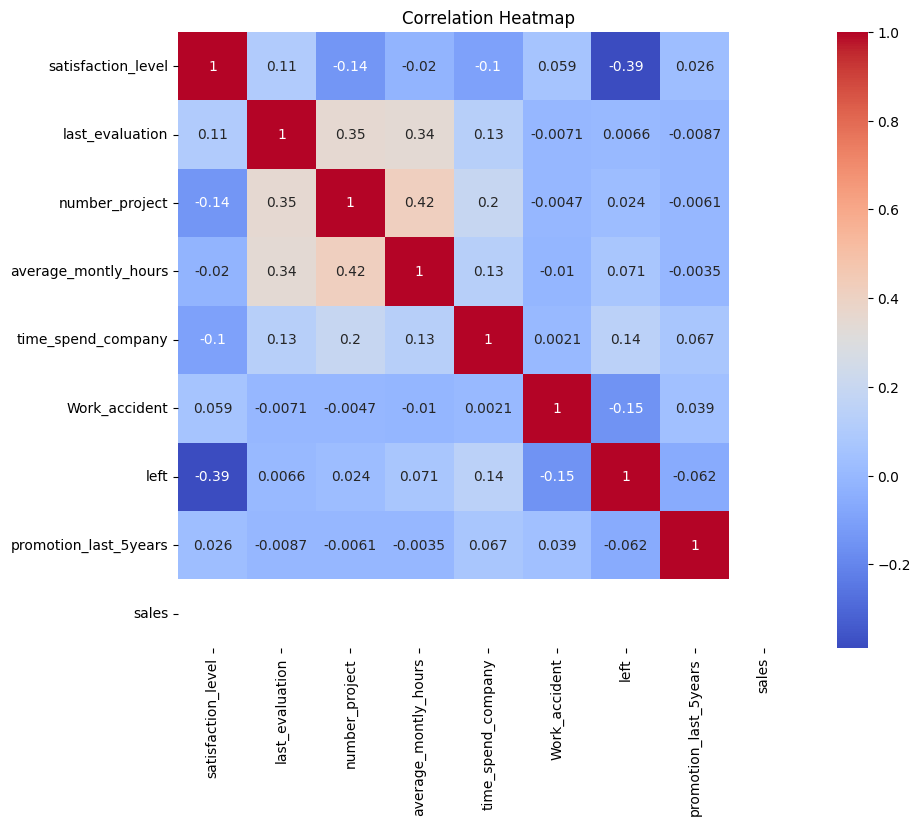

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)
df = df.drop(non_numeric_cols, axis=1)
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Distribution Plots

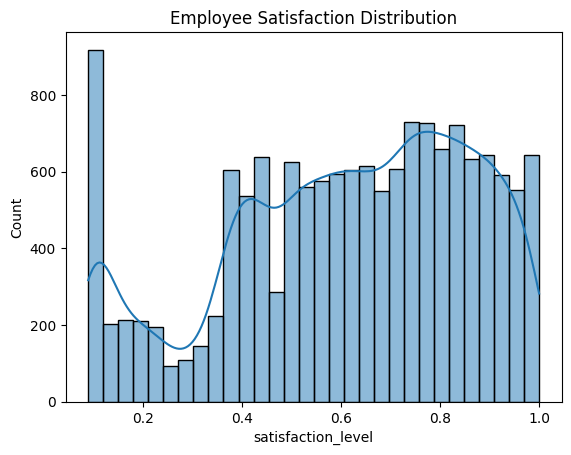

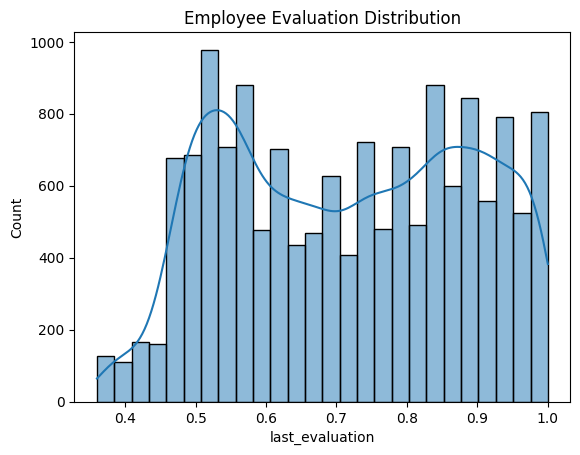

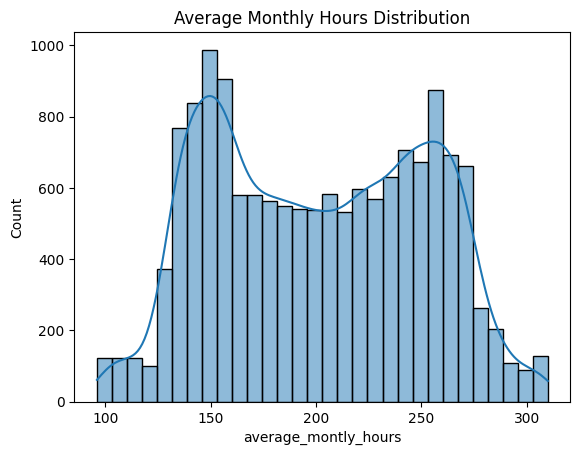

In [17]:
# Satisfaction Level
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Employee Satisfaction Distribution')
plt.show()

# Last Evaluation
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Employee Evaluation Distribution')
plt.show()

# Average Monthly Hours
sns.histplot(df['average_montly_hours'], kde=True)
plt.title('Average Monthly Hours Distribution')
plt.show()


# Bar Plot for Project Count

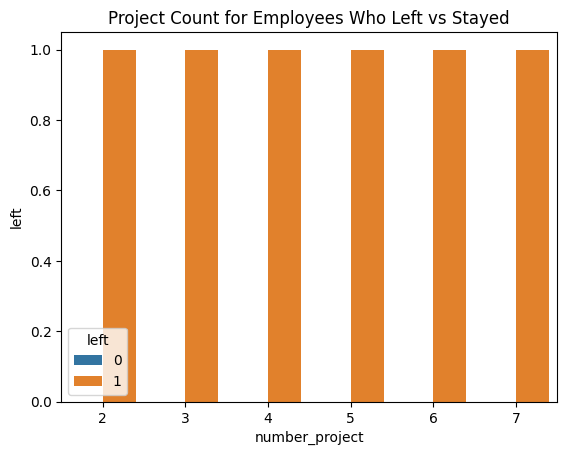

In [5]:
# Bar plot for the number of projects with 'left' as hue
sns.barplot(x='number_project', y='left', data=df, hue='left')
plt.title('Project Count for Employees Who Left vs Stayed')
plt.show()


# Clustering of Employees Who Left
 Choose Columns
Focus on satisfaction_level, last_evaluation, and left columns.

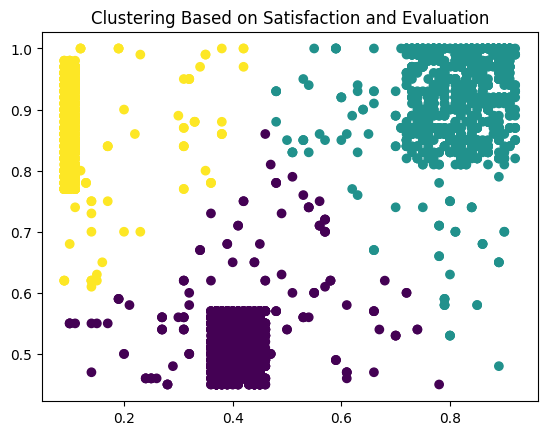

In [12]:
from sklearn.cluster import KMeans

# Filter data for employees who left
left_df = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_df['cluster'] = kmeans.fit_predict(left_df)

# Visualize the clusters
plt.scatter(left_df['satisfaction_level'], left_df['last_evaluation'], c=left_df['cluster'], cmap='viridis')
plt.title('Clustering Based on Satisfaction and Evaluation')
plt.show()


# Handling Class Imbalance with SMOTE

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Convert categorical variables to numeric using get_dummies
df_processed = pd.get_dummies(df, drop_first=True)

# Split data into train and test
X = df_processed.drop('left', axis=1)
y = df_processed['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


#Model Training and Cross-Validation

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Logistic Regression
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

models = [lr, rf, gb]
for model in models:
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2286
           1       0.50      0.77      0.61       714

    accuracy                           0.76      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.76      0.78      3000

Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Model: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96     

# Model Evaluation

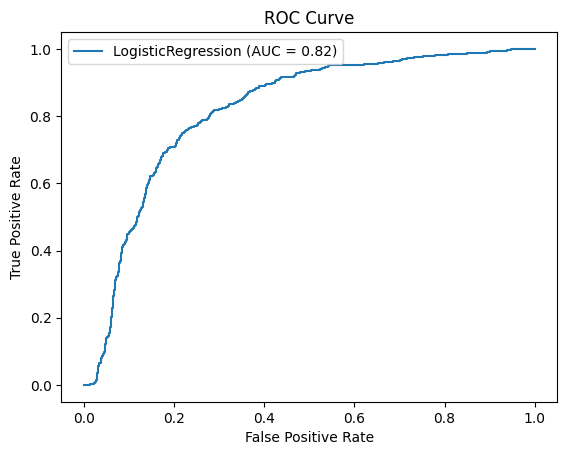

Confusion Matrix for LogisticRegression
[[2231   55]
 [  45  669]]


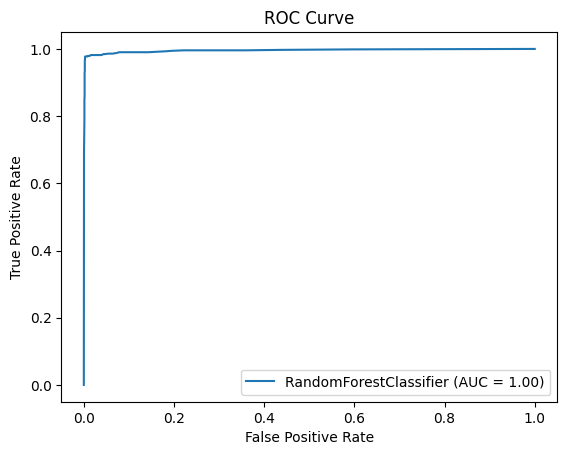

Confusion Matrix for RandomForestClassifier
[[2231   55]
 [  45  669]]


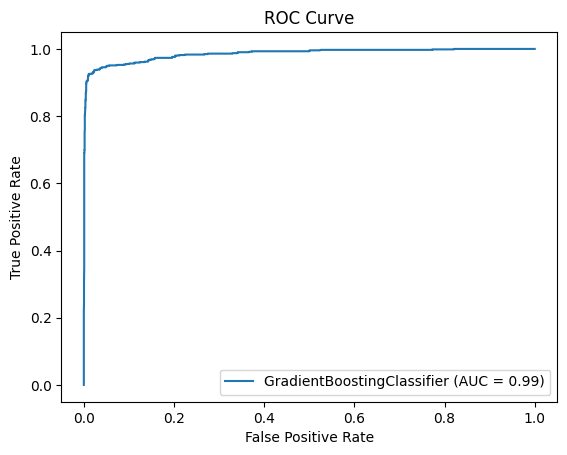

Confusion Matrix for GradientBoostingClassifier
[[2231   55]
 [  45  669]]


In [9]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

for model in models:
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Confusion Matrix
    print(f"Confusion Matrix for {model.__class__.__name__}")
    print(confusion_matrix(y_test, y_pred))


# Predict Employee Turnover Probability
Using the best model:

In [10]:
best_model = lr # Assume Logistic Regression is the best
y_pred_proba_test = best_model.predict_proba(X_test)[:,1]

# Categorize into risk zones
zones = pd.cut(y_pred_proba_test, bins=[0, 0.2, 0.6, 0.9, 1.0], labels=['Safe Zone', 'Low-Risk Zone', 'Medium-Risk Zone', 'High-Risk Zone'])
X_test['Risk Zone'] = zones

# Display employees in each risk zone
print(X_test.groupby('Risk Zone').size())


Risk Zone
Safe Zone           1073
Low-Risk Zone       1062
Medium-Risk Zone     721
High-Risk Zone       144
dtype: int64


<ipython-input-10-992109c66691>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(X_test.groupby('Risk Zone').size())


# Summary of whole analysis

**Portobello Tech Employee Turnover Analytics Project**

Portobello Tech, an innovative app company, is focused on predicting employee turnover using machine learning. The HR department periodically evaluates employee data such as satisfaction levels, evaluation ratings, project involvement, average monthly working hours, tenure, work accidents, promotions, department, and salary. This project aims to build a model that can accurately predict whether an employee will leave the company, providing insights into the factors driving turnover and helping HR design targeted retention strategies.

### Project Objectives:
As the ML Developer assigned to this project, the primary tasks are as follows:

1. **Data Quality Checks**:
   - **Objective**: Ensure the dataset is clean and ready for modeling.
   - **Approach**: Perform initial checks to identify missing values, verify data types, and summarize the key statistical properties of the data using functions like `df.isnull().sum()` and `df.describe()` in Python. This ensures the dataset is suitable for further analysis without any inconsistencies.

2. **Exploratory Data Analysis (EDA)**:
   - **Objective**: Understand the factors contributing to employee turnover.
   - **Approach**:
     - **Correlation Heatmap**: A heatmap of the correlation matrix helps identify relationships between numerical features (like satisfaction levels and monthly hours) and how they relate to the target variable, `left` (indicating whether the employee stayed or left).
     - **Distribution Plots**: Visualize the distribution of key variables such as employee satisfaction (`satisfaction_level`), last evaluation score (`last_evaluation`), and average monthly working hours (`average_montly_hours`). This helps uncover patterns in how these features differ between employees who stayed and those who left.
     - **Project Count Bar Plot**: Plot the number of projects (`number_project`) and compare this across employees who left versus those who stayed. This bar plot reveals whether project count has a strong correlation with turnover.

3. **Clustering Employees Who Left**:
   - **Objective**: Group employees who left into meaningful clusters based on their satisfaction and evaluation scores.
   - **Approach**: Using K-Means clustering, employees who left the company are grouped into three clusters. This clustering is based on their satisfaction and evaluation scores, helping to identify different employee profiles within those who left. Visualization of these clusters can reveal distinct patterns, such as employees who may have been overworked or under-engaged.

4. **Handling Class Imbalance with SMOTE**:
   - **Objective**: Address the imbalance in the target variable (`left`), where far fewer employees may have left compared to those who stayed.
   - **Approach**: The Synthetic Minority Over-sampling Technique (SMOTE) is used to upsample the minority class (employees who left) in the training dataset. Before applying SMOTE, categorical variables are converted to numerical format using techniques like `get_dummies()`, and the dataset is split into train and test sets using a stratified split (80% train, 20% test).

5. **Model Training and 5-Fold Cross-Validation**:
   - **Objective**: Build machine learning models to predict employee turnover.
   - **Approach**: Three different models are trained using the resampled training data:
     - **Logistic Regression**: A baseline model to understand the linear relationships in the data.
     - **Random Forest**: A more complex model to capture non-linear interactions between features.
     - **Gradient Boosting**: A boosting model that builds decision trees sequentially, optimizing performance.
     Each model undergoes 5-fold cross-validation, and a classification report is generated to compare performance metrics like precision, recall, and F1-score.

6. **Model Evaluation**:
   - **Objective**: Identify the best model for predicting employee turnover.
   - **Approach**: Models are evaluated using ROC/AUC curves to compare their ability to differentiate between employees who leave and those who stay. Additionally, confusion matrices are generated to evaluate model accuracy. Metrics such as recall and precision are analyzed to determine which is more important based on HR’s priorities (e.g., catching employees at high risk of leaving might prioritize recall).

7. **Retention Strategies**:
   - **Objective**: Suggest actionable strategies to retain employees based on the model predictions.
   - **Approach**: Using the best model, employee turnover probability is predicted for the test data. Based on this probability, employees are categorized into four risk zones:
     - **Safe Zone (Score < 20%)**: Low likelihood of leaving. Continue existing policies.
     - **Low-Risk Zone (20% < Score < 60%)**: Engage employees with additional support.
     - **Medium-Risk Zone (60% < Score < 90%)**: Offer incentives like promotions or career development.
     - **High-Risk Zone (Score > 90%)**: Immediate intervention is needed to prevent turnover.

### Conclusion:
This project will not only help predict employee turnover but also provide HR with valuable insights to create targeted retention strategies based on the risk profiles of employees. Through careful data analysis, model building, and evaluation, Portobello Tech can reduce employee churn and improve overall workforce satisfaction and stability.